##### 任何机器学习模型在训练集上的性能表现，都不能作为其对未知测试数据预测能力的评估

#### 这一节我们将讲到使用正则化regularization来增加模型的泛化generalization能力，避免模型参数过拟合overfitting,
#### 所谓的拟合，是指机器学习在训练的过程中，通过更新参数，使得模型不断契合可观察数据的过程

In [23]:
### 接下来，我们构造数据，用线性拟合数据。x_train表示长度，y_train表示重量
x_train = [[6],[8],[10],[14],[18]]
y_train = [[7],[9],[13],[17.5],[18]]

In [24]:
#引入sklearn中的linear_model中的LinearRegression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
#从0到30随机采样50个数据
import numpy as np
datas = np.linspace(0,30,50)
lr_predict = lr.predict(datas.reshape(datas.shape[0],1))

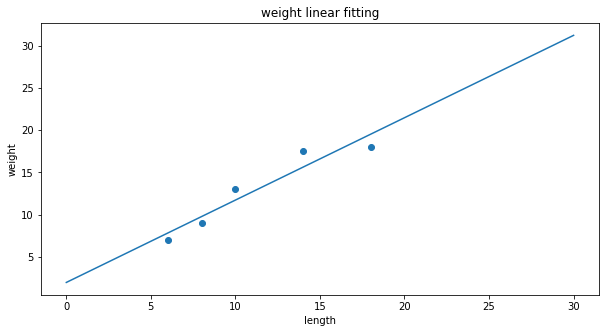

In [26]:
#对结果作图
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(x_train,y_train)
plt.plot(datas,lr_predict)
plt.xlabel('length')
plt.ylabel('weight')
plt.title('weight linear fitting')
plt.show()

In [27]:
#输出拟合优度R-scores的值
print('R-sqared: %s'%(lr.score(x_train,y_train)))

R-sqared: 0.910001596424


### 也许重量和盒子的长度的平方或者立方有关系呢？假设盒子时候正方体，我们试一下多元多次的线性回归

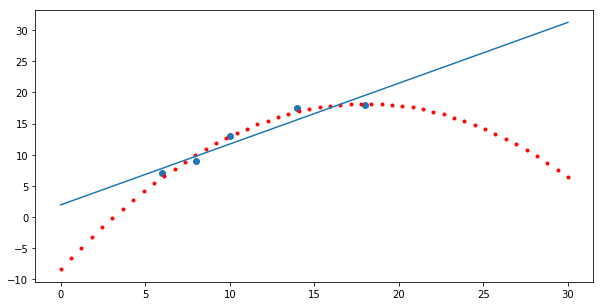

In [28]:
#从sklearn preprocessing中导入PolynomialFeatures多项式特征选择器
from sklearn.preprocessing import PolynomialFeatures
#初始化2次多项式特征
poly2 = PolynomialFeatures(degree=2)
x_train_poly2 = poly2.fit_transform(x_train)

poly2_lr = LinearRegression()
poly2_lr.fit(x_train_poly2,y_train)

#构造的从0到30随机采样500个数据，也要使用poly2特征转换器进行转化
xx_ploy2 = poly2.transform(datas.reshape(datas.shape[0],1))
poly2_lr_predict = poly2_lr.predict(xx_ploy2)
#绘图
plt.figure(figsize=(10,5))
plt.scatter(x_train,y_train)

#二次线性回归
plt.plot(datas,poly2_lr_predict,"r.")
#一次线性回归
plt.plot(datas,lr_predict)

plt.show()

In [29]:
#打印出拟合优度R-sqared
print('R-sqared: %s'%poly2_lr.score(x_train_poly2,y_train))

R-sqared: 0.98164216396


In [139]:
#从上面可以看到，拟合优度达到了0.98，拟合的很好了是吧？我们还可以更疯狂，增加到4次方程试试？

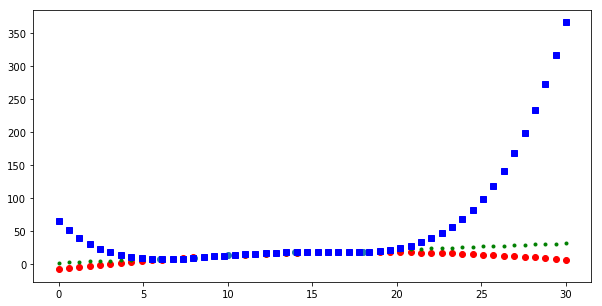

In [30]:
from sklearn.preprocessing import PolynomialFeatures
poly_4 = PolynomialFeatures(degree=4)

x_train_poly_4 = poly_4.fit_transform(x_train)

lr_poly_4 = LinearRegression()

lr_poly_4.fit(x_train_poly_4,y_train)
xx_poly_4 = poly_4.transform(datas.reshape(datas.shape[0],1))
lr_poly_4_predict = lr_poly_4.predict(xx_poly_4)

#绘图
#绘图
plt.figure(figsize=(10,5))
plt.scatter(x_train,y_train)

#二次线性回归
plt.plot(datas,poly2_lr_predict,'ro')
#一次线性回归
plt.plot(datas,lr_predict,'g.')
#五次线性回归
plt.plot(datas,lr_poly_4_predict,'bs')

plt.show()

In [31]:
#打印出拟合优度R-sqared
print('R-sqared: %s'%lr_poly_4.score(x_train_poly_4,y_train))

R-sqared: 1.0


In [33]:
#拟合优度R-sarared更高了！！！，是不是拟合的更好了呢，显然不是的，虽然2次和3次方程穿过的点比1次的多，但是这是在训练集上，若出现
#一个测试数据，往往在训练数据上性能很好的模型，在测试数据上表现的不好，这就是说模型过拟合了。现在用真实的数据来评估一下
x_test = [[6],[8],[11],[16]]
y_test = [[8],[11.9],[15],[18]]

In [34]:
lr.score(x_test,y_test)

0.81852237896107904

In [35]:
poly2_lr.score(poly2.transform(x_test),y_test)

0.8752466041768262

In [36]:
lr_poly_4.score(poly_4.transform(x_test),y_test)

0.82120524213809176

##### 综上，当模型复杂度很低的时候，模型在训练集上的拟合优度和测试集上的拟合优度都表现平平，这种状态叫做Underfitting
##### 但是当模型的复杂度很高的时候，在测试集上拟合了所有的数据，但是从图形来看，该模型变得非常波动，几乎丧失了预测能力，这种情况较过拟合
##### Overfitting，这两种都是泛化能力不行的表现

### 正则化

##### 正则化的目的在与提高模型在位置测试数据集上的泛化能力，避免参数过拟合Overfitting，上面的例子中，之所以出现四次项那样过拟合的情况，
##### 是由于四次项系数过大，或者不为0导致。
####  因此正则化的常见方法都是在原模型优化的目标基础上，增加对参数的惩罚项Penlty，如果对模型采用L1正则化，新的线性回归目标为：
####  argmin(L(w,b)) = argmin(sum((f(w,x,b)-yk)^2+s.||w||))
####  也就是说在原优化目标的基础上，增加参数向量L1范数。如此在新目标的优化过程中，同时需要考虑L1惩罚项的影响，
####  为了使目标最小化，这种正则化方法的结果会让参数向量中的许多元素趋于0，使得大部分特征时区对优化目标的贡献，这种让有效特征变得稀疏
#### Sparse的L1正则化模型，通常被叫做Lasso


### 使用Lasso模型在4次项特征上拟合表现

In [37]:
from sklearn.linear_model import Lasso
lasso_poly_4 = Lasso()
#使用lasso对4次项进行拟合
lasso_poly_4.fit(x_train_poly_4,y_train)

D:\softwares\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [38]:
#进行性能评估
lasso_poly_4.score(poly_4.transform(x_test),y_test)

0.84836195880858811

In [39]:
#可以看到性能提升了2%左右，在来输出参数
print('四次项参数：\n',lr_poly_4.coef_)
print('lasso四次项参数:\n',lasso_poly_4.coef_)

四次项参数：
 [[  0.00000000e+00  -2.51739583e+01   3.68906250e+00  -2.12760417e-01
    4.29687500e-03]]
lasso四次项参数:
 [  0.00000000e+00   0.00000000e+00   1.17900534e-01   5.42646770e-05
  -2.23027128e-04]


### 可以看到，lasso将四次和三次项系数都变为了0，是特征参数更加稀疏，可见lasso对系数的惩罚生效了

### L2范数正则化

###### 与Lasso不同的是，L2范数正则化在原优化目标的基础上，增加了参数向量的L2范数惩罚项，为了使新优化目标最小化，这种这则法的结果会让参数向量
###### 中的大部分元素都变得很小，压制了参数之间的差异性，而这种压制参数之间差异性的L2正则化模型，通常被称为Ridge。
### 优化目标为
### argmin(L((w,b))) = argmin(sum((f(w,k,b)-yk)^2+x||w||2))

## Ridge模型在四次项特征上的拟合表现

In [40]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train_poly_4,y_train)
#Ridge在R-sqared
ridge.score(poly_4.transform(x_test),y_test)

0.84690974178372924

In [41]:
#查看参数
ridge.coef_

array([[ 0.        , -0.00492536,  0.12439632, -0.00046471, -0.00021205]])

In [42]:
print('ridge参数平方和：%s'%(np.sum(ridge.coef_ ** 2)))
print('四次项参数平方和：%s'%(np.sum(lr_poly_4.coef_ ** 2)))

ridge参数平方和：0.0154989652036
四次项参数平方和：647.382645692


In [171]:
#从上面输出可以看到Ridge回归确实降低了参数之间的差异性

## 不论Lasso的L1惩罚项还是Ridge的L2惩罚项，前面都有一个因子lamda进行调节